# Import Basic Libraries

In [31]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.io as pio

# Theme settings
sns.set_theme(style="whitegrid", palette="Set2")
pio.templates.default = "plotly_white"

# Load the Dataset from CSV file

In [32]:
# Load Dataset
cleaned_marketing_data = pd.read_csv('cleaned_marketing_data.csv')

# Feature Engineering: Creating New Columns for Number of Children and Customer Registration Year

In [33]:
# Derived Columns
cleaned_marketing_data['KidsAtHome'] = cleaned_marketing_data['Kidhome'] + cleaned_marketing_data['Teenhome']
cleaned_marketing_data['Year_Customer'] = pd.to_datetime(cleaned_marketing_data['Dt_Customer']).dt.year

# Income Distribution

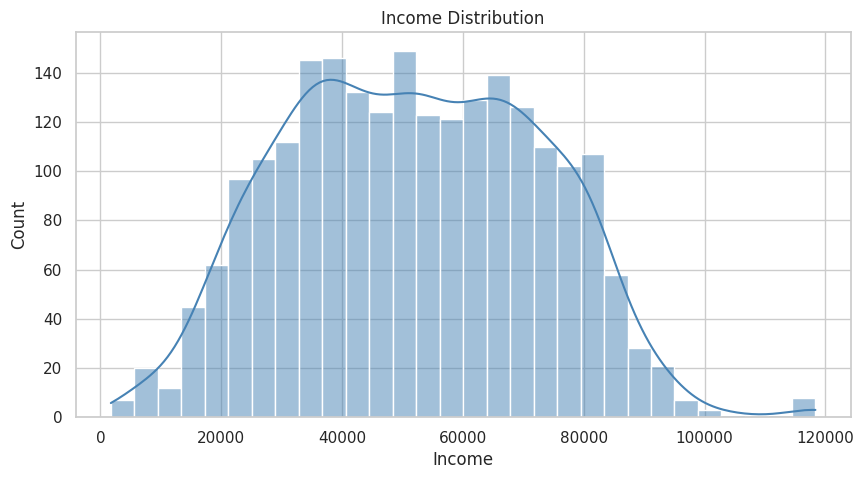

In [34]:
# 1. Income Distribution - Histogram with KDE
plt.figure(figsize=(10,5))
sns.histplot(cleaned_marketing_data['Income'], kde=True, color='steelblue', bins=30)
plt.title('Income Distribution')
plt.show()

# Average income by education

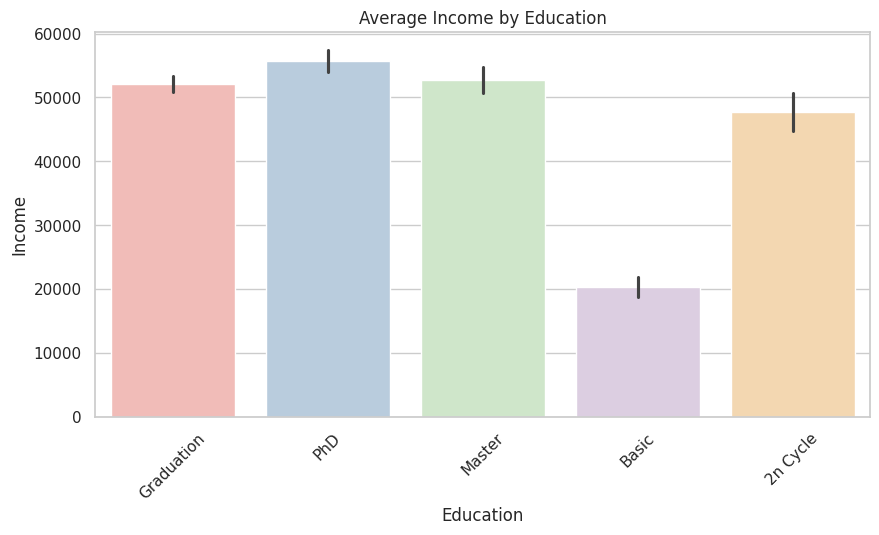

In [35]:
# 2. Average Income by Education - Vertical Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Education', y='Income', hue='Education', data=cleaned_marketing_data, palette='Pastel1', legend=False)
plt.title('Average Income by Education')
plt.xticks(rotation=45)
plt.show()

# Average income by marital status

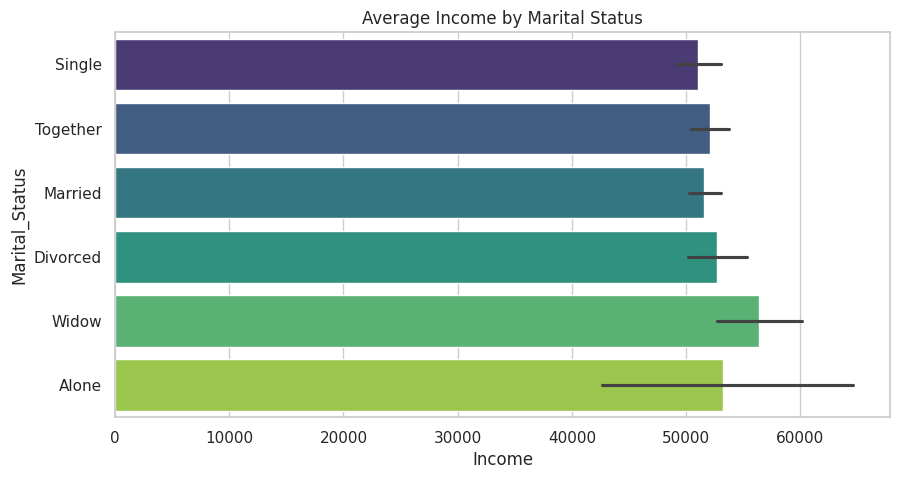

In [36]:
# 3. Average Income by Marital Status - Horizontal Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(y='Marital_Status', x='Income', hue='Marital_Status', data=cleaned_marketing_data, palette='viridis', legend=False)
plt.title('Average Income by Marital Status')
plt.show()

# Education distribution

In [37]:
# 4. Education Distribution - Pie Chart
edu_count = cleaned_marketing_data['Education'].value_counts()
fig = px.pie(names=edu_count.index, values=edu_count.values,
             title='Education Distribution', color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

# Martial Status Distribution

In [38]:
# 5. Marital Status Distribution - Pie Chart
marital_count = cleaned_marketing_data['Marital_Status'].value_counts()
fig = px.pie(names=marital_count.index, values=marital_count.values,
             title='Marital Status Distribution', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Product spending

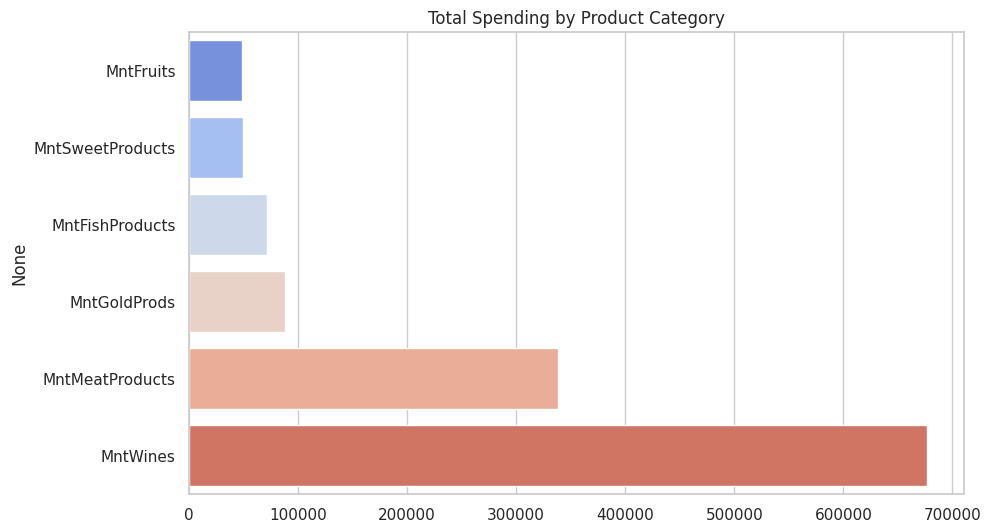

In [39]:
# 6. Product Spending Breakdown - Horizontal Bar Plot
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_sum = cleaned_marketing_data[product_columns].sum().sort_values(ascending=True)
plt.figure(figsize=(10,6))
sns.barplot(x=product_sum.values, y=product_sum.index, hue=product_sum.index, dodge=False, palette='coolwarm', legend=False)
plt.title('Total Spending by Product Category')
plt.show()

# Purchase channel preferences

In [40]:
# 7. Purchase Channel Preferences - Donut Chart
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_sum = cleaned_marketing_data[purchase_cols].sum()
fig = px.pie(names=purchase_sum.index, values=purchase_sum.values, hole=0.5,
             title='Preferred Purchase Channels', color_discrete_sequence=px.colors.sequential.Sunset)
fig.show()

# Marital Status & Kids at Home

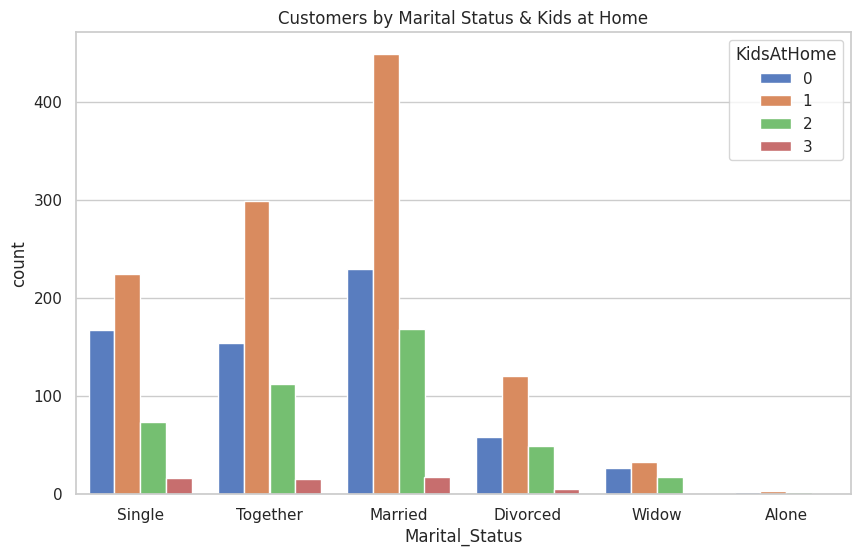

In [41]:
# 8. Marital Status & Kids at Home - Grouped Bar Plot
plt.figure(figsize=(10,6))
sns.countplot(x='Marital_Status', hue='KidsAtHome', data=cleaned_marketing_data, palette='muted')
plt.title('Customers by Marital Status & Kids at Home')
plt.show()

# Customers by Year of Birth

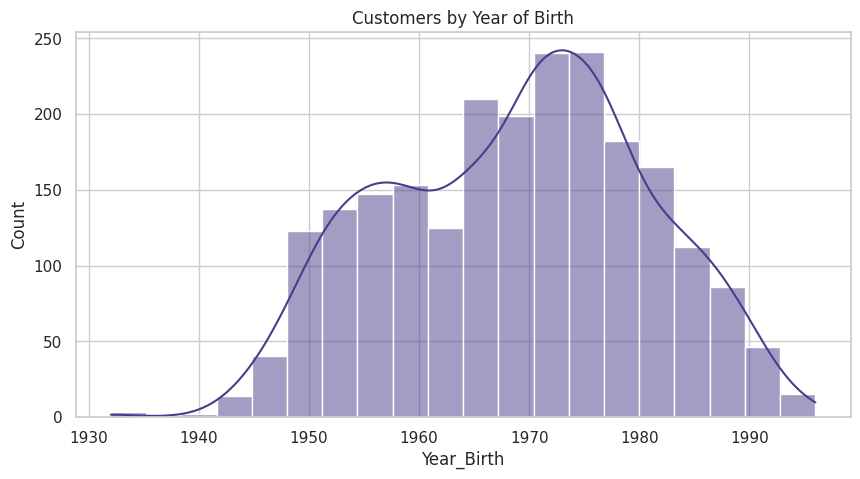

In [42]:
# 9. Customers by Year of Birth - Histogram
plt.figure(figsize=(10,5))
sns.histplot(cleaned_marketing_data['Year_Birth'], kde=True, bins=20, color='darkslateblue')
plt.title('Customers by Year of Birth')
plt.show()

# Income Trend over Birth Year

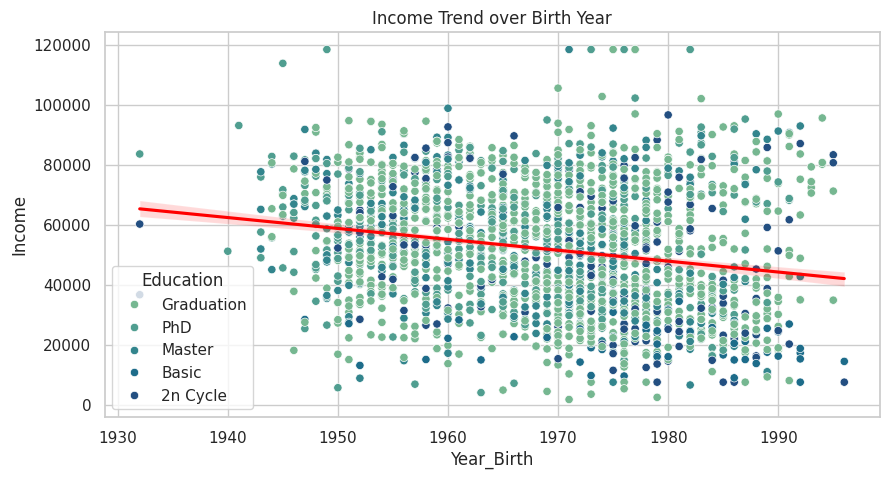

In [43]:
# 10. Income Trend over Birth Year - Scatter + Regression
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year_Birth', y='Income', data=cleaned_marketing_data, hue='Education', palette='crest')
sns.regplot(x='Year_Birth', y='Income', data=cleaned_marketing_data, scatter=False, color='red')
plt.title('Income Trend over Birth Year')
plt.show()

# Income Trend over Join Year

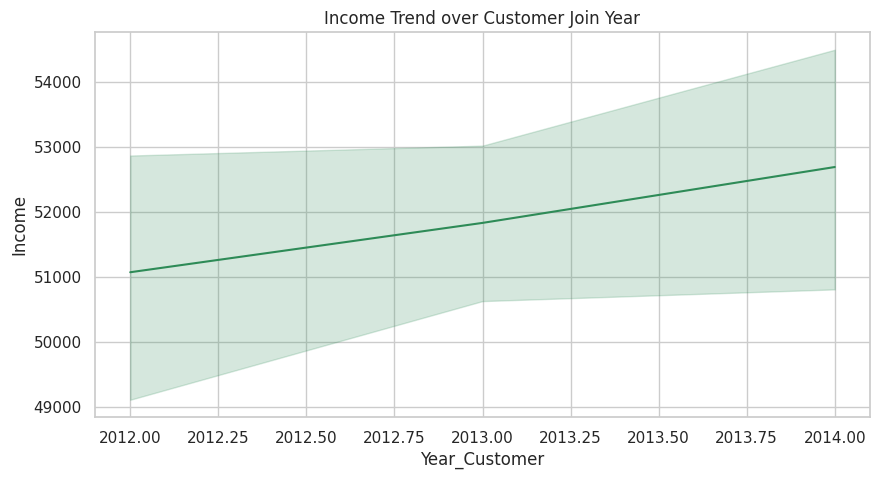

In [44]:
# 11. Income Trend over Join Year - Line Plot
plt.figure(figsize=(10,5))
sns.lineplot(x='Year_Customer', y='Income', data=cleaned_marketing_data, color='seagreen')
plt.title('Income Trend over Customer Join Year')
plt.show()

# Income vs Wine Spending

In [45]:
# 12. Income vs Wine Spending - Bubble Plot
fig = px.scatter(cleaned_marketing_data, x='Income', y='MntWines',
                 size='MntMeatProducts', color='Education',
                 title='Income vs Wine Spending (Bubble by Meat Spending)',
                 color_discrete_sequence=px.colors.sequential.Viridis)
fig.show()


# Pairwise Scatter Plots

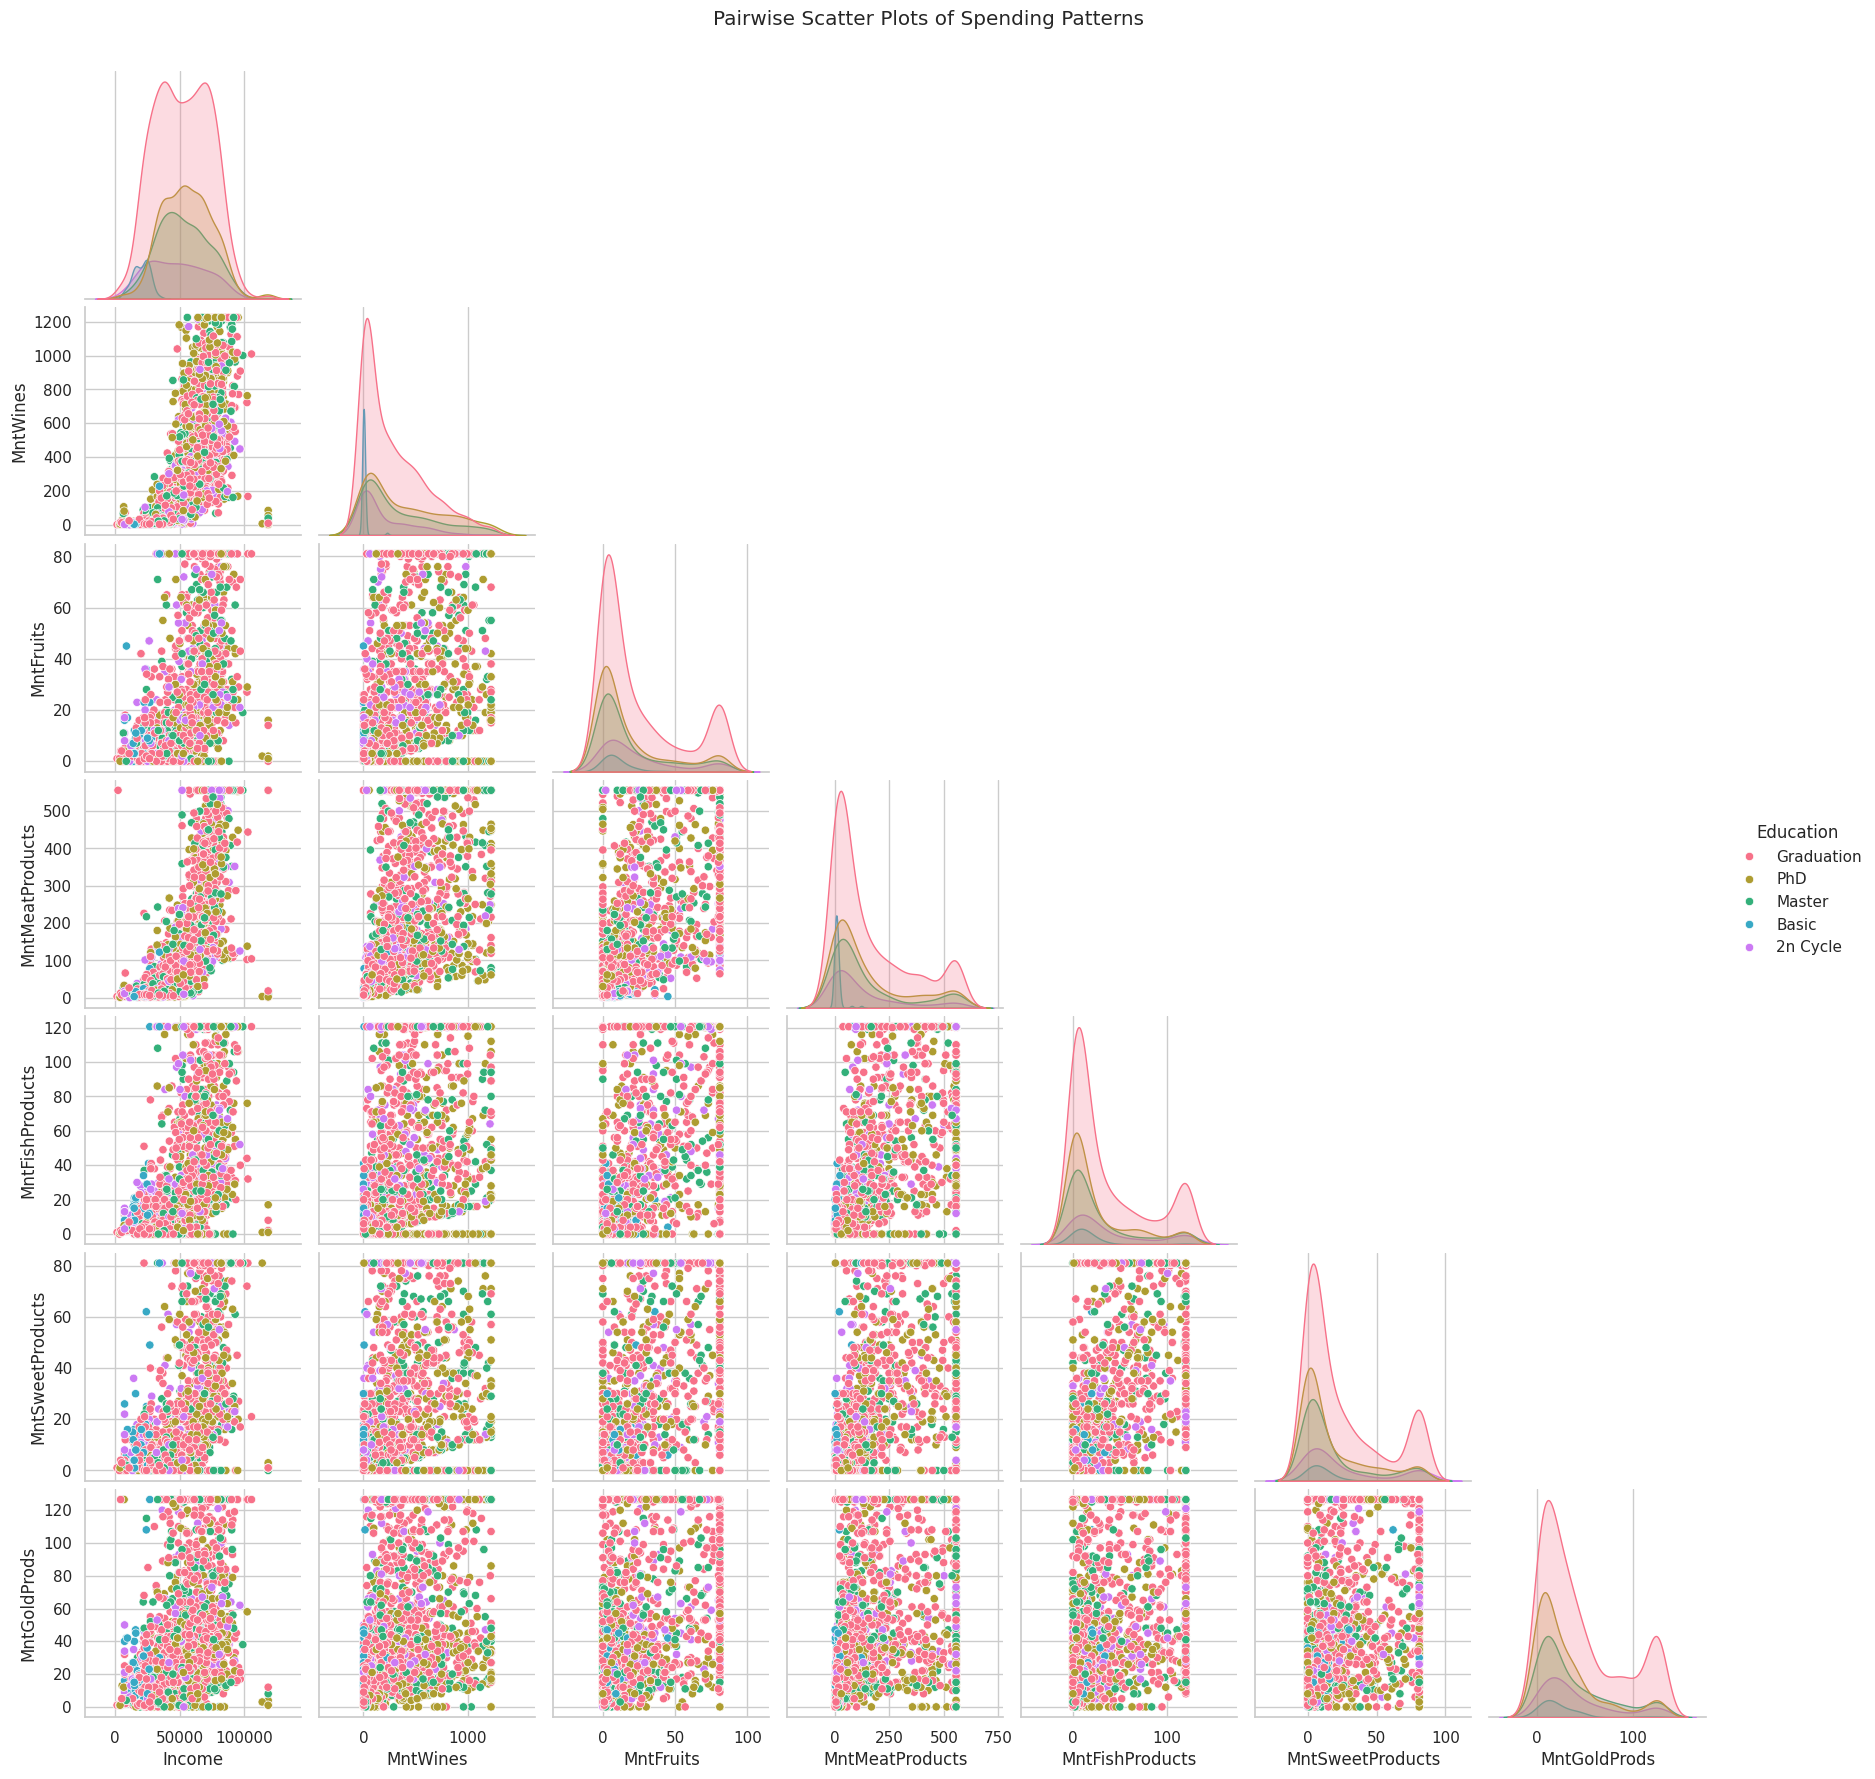

In [46]:
# 13. Pairwise Scatter Plots - Pairplot
sns.pairplot(cleaned_marketing_data[['Income'] + product_columns + ['Education']],
             hue='Education', corner=True, palette='husl')
plt.suptitle('Pairwise Scatter Plots of Spending Patterns', y=1.02)
plt.show()

# Correlation Matrix

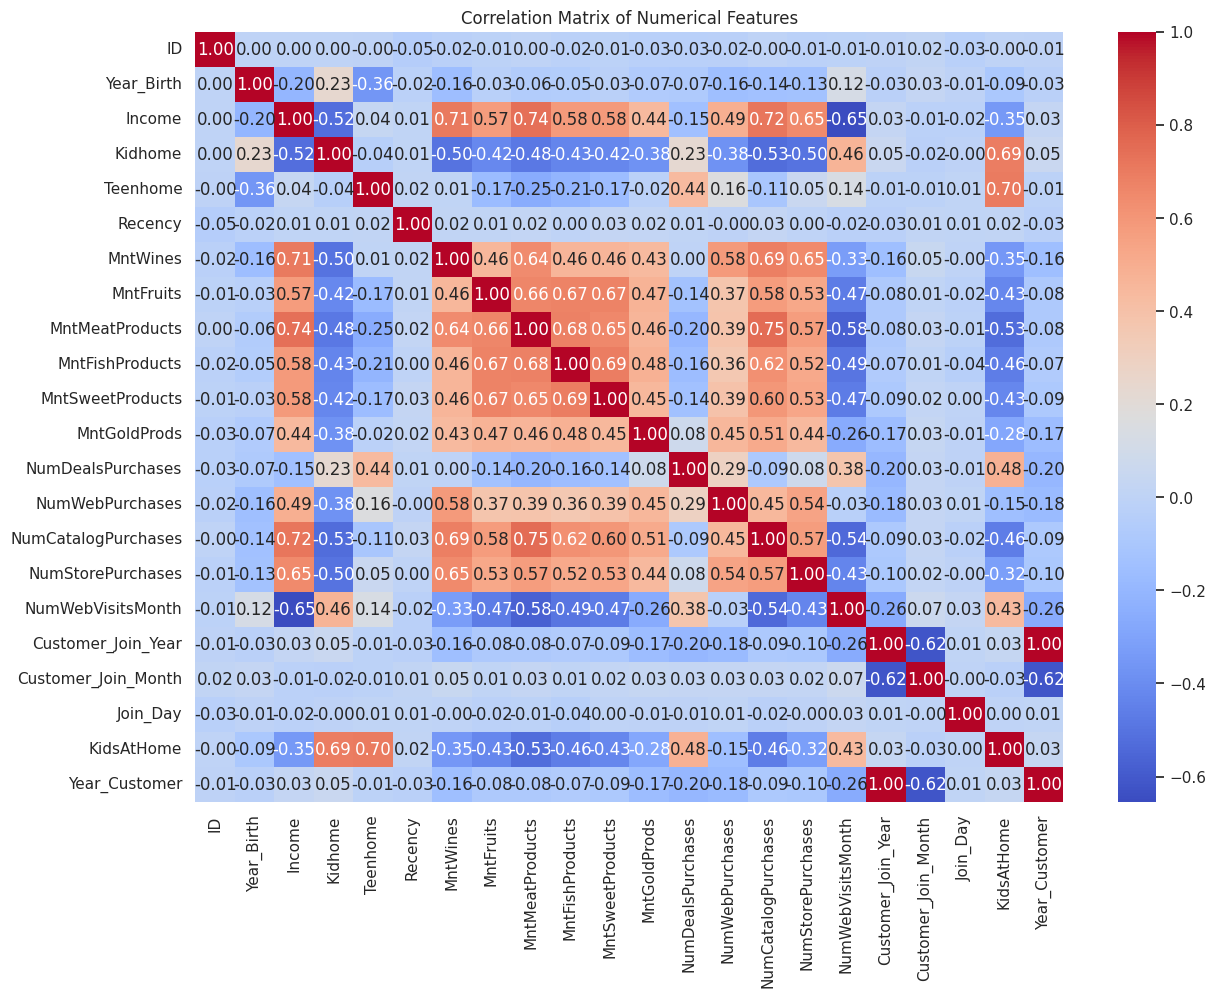

In [47]:
# 14. Correlation Matrix - Heatmap
plt.figure(figsize=(14,10))
corr = cleaned_marketing_data.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Recency Distribution

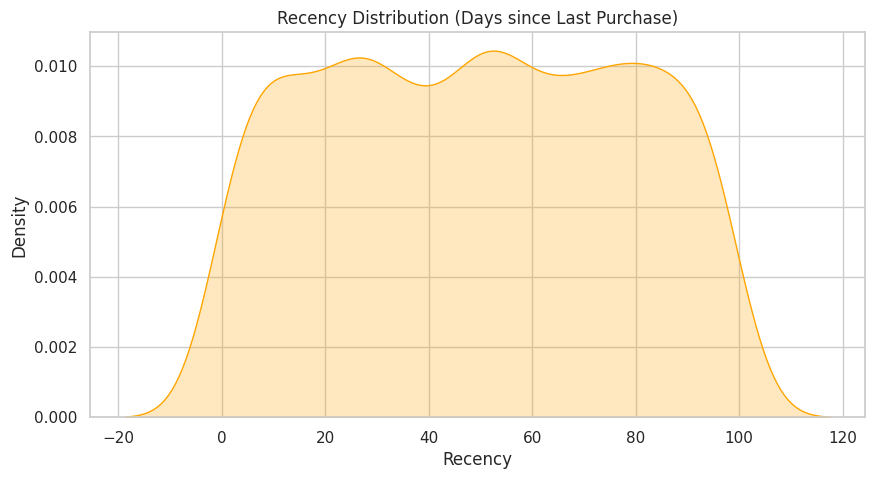

In [48]:
# 15. Recency Distribution - KDE Plot
plt.figure(figsize=(10,5))
sns.kdeplot(data=cleaned_marketing_data['Recency'], fill=True, color="orange")
plt.title('Recency Distribution (Days since Last Purchase)')
plt.show()

# Web Visits vs Web Purchases

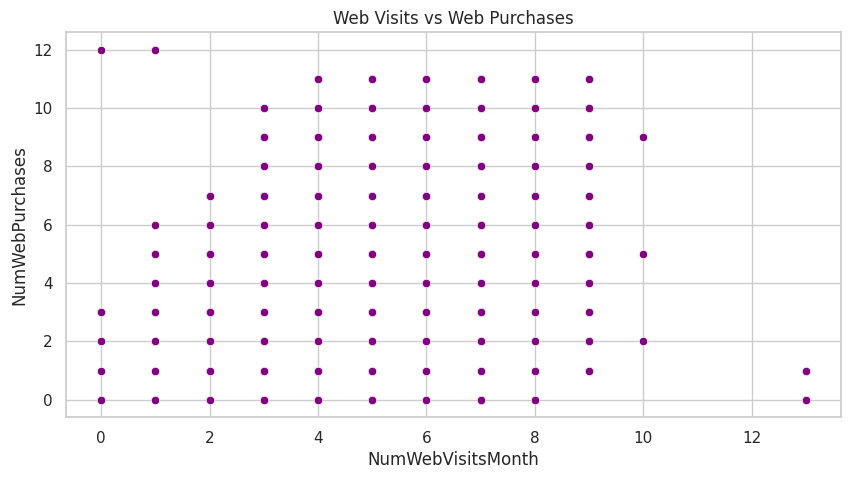

In [49]:
# 16. Web Visits vs Web Purchases - Scatter Plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=cleaned_marketing_data, color='purple')
plt.title('Web Visits vs Web Purchases')
plt.show()

# Deals Purchased vs Store Purchases

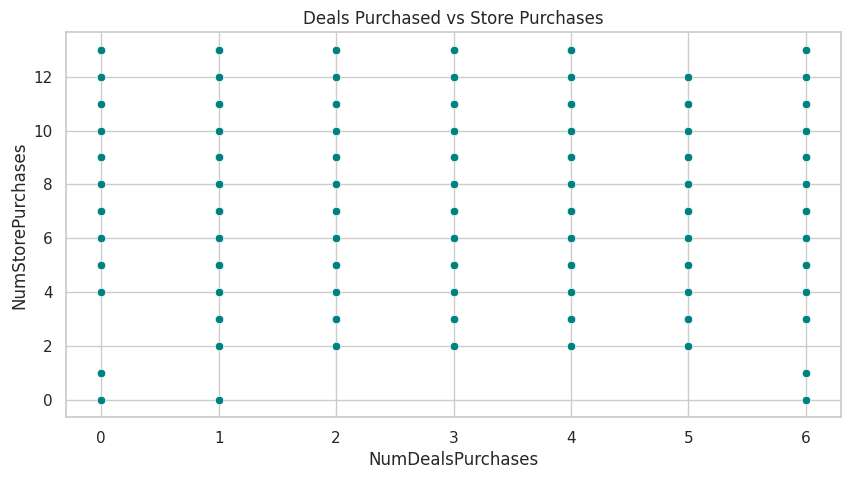

In [50]:
# 17. Deals Purchased vs Store Purchases - Scatter Plot
plt.figure(figsize=(10,5))
sns.scatterplot(x='NumDealsPurchases', y='NumStorePurchases', data=cleaned_marketing_data, color='teal')
plt.title('Deals Purchased vs Store Purchases')
plt.show()

# Customer Loyalty by Year of Joining

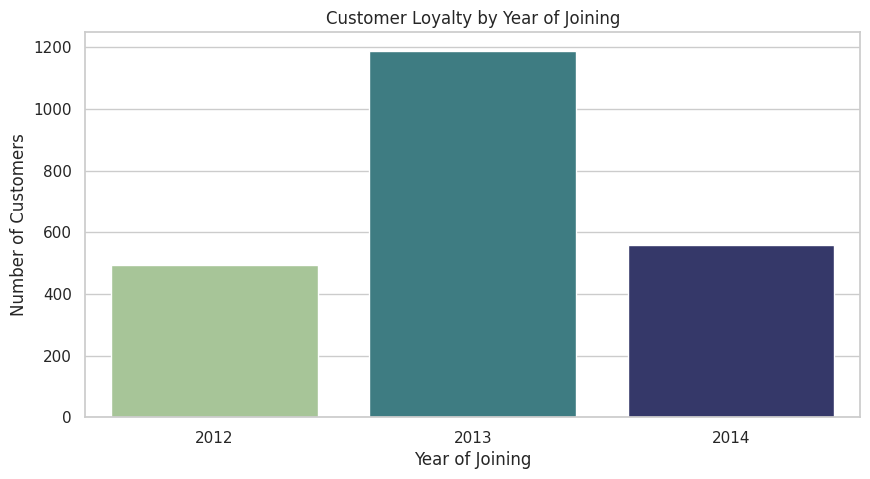

In [53]:
# 18. Customer Loyalty by Year of Joining - Bar Plot

# Prepare DataFrame for plotting
year_counts = cleaned_marketing_data['Year_Customer'].value_counts().sort_index().reset_index()
year_counts.columns = ['Year_Customer', 'Customer_Count']

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Year_Customer', y='Customer_Count', hue='Year_Customer',data=year_counts, palette='crest', legend=False)
plt.title('Customer Loyalty by Year of Joining')
plt.xlabel('Year of Joining')
plt.ylabel('Number of Customers')
plt.show()